# Display image

In [1]:
# reading re-sized image through canvas
from ipycanvas import Canvas

from skimage.data import retina
from skimage.util import img_as_ubyte
from skimage.transform import resize

img = img_as_ubyte(retina())
width, height, _ = img.shape
resize_f = 0.5
width_resized = width * resize_f
height_resized = height * resize_f
canvas = Canvas(width=width_resized, height=height_resized)
img_resized = img_as_ubyte(resize(img, (width_resized, height_resized)))
canvas.put_image_data(img_resized, 0, 0)
canvas

Canvas(height=705, width=705)

# Handle mouse input: draw circles at each mouse click

In [2]:
import numpy as np
from ipycanvas import Canvas, hold_canvas
from ipywidgets import Output

canvas = Canvas(width=300, height=300)

out = Output()

def draw_circle(x, y):
    alpha = [0.5]
    r = [5]
    color_fill = [[68, 156,  61]]
    color_outline = [[183, 228, 164]]
    canvas.fill_styled_circles(x, y, r, color=color_fill, alpha=alpha)
    canvas.line_width = 2
    canvas.stroke_styled_circles(x, y, r, color=color_outline)

@out.capture()
def handle_touch_move(x, y):
    draw_circle(x, y)

canvas.on_mouse_up(handle_touch_move)
canvas

Canvas(height=300, width=300)

# Point Annotator

In [3]:
from egsis.annotators import PointAnnotator
from skimage.data import retina

annotator = PointAnnotator(image=retina(), classes=["fg", "retina"], resize_f = 0.3)

annotator.display()

In [4]:
annotator.data

[]

In [5]:
annotator.labels_by_name

{1: 'fg', 2: 'retina'}

In [6]:
annotator.labels_by_color

{}

In [7]:
annotator.label_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

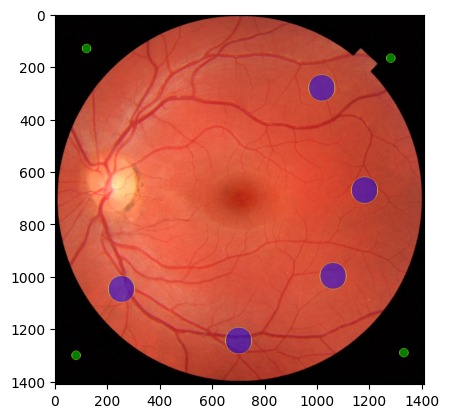

In [11]:
import matplotlib.pyplot as plt
from egsis import image

plt.imshow(image.segmentation_mask_blend(img, annotator.label_matrix, annotator.labels_by_color))

In [9]:
import numpy as np
np.unique(annotator.label_matrix)

array([0])

In [10]:
annotator.label_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])